In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

Load Dataset

In [12]:
df=pd.read_csv("diabetes.csv")

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Prepare Data

In [14]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols:
    df[c]=df[c].replace(0,np.nan)
    df[c]=df[c].fillna(df[c].median())

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(768, 9)

Prepare Features and Target

In [17]:
X=df.drop('Outcome',axis=1)

In [18]:
y=df['Outcome']

Apply Feature Scaling

In [19]:
scaler=StandardScaler()

In [20]:
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

Split Data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

Train All Models

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
knn=KNeighborsClassifier(n_neighbors=11)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [28]:
dt=DecisionTreeClassifier(random_state=42)

In [29]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Make Predictions

In [30]:
y_pred_lr=lr.predict(X_test)

In [31]:
y_pred_knn=knn.predict(X_test)

In [32]:
y_pred_dt=dt.predict(X_test)

Task 1: Compare Models Using Evaluation Metrics

In [33]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_dt=accuracy_score(y_test,y_pred_dt)

In [34]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Logistic Regression Accuracy: 0.7532
KNN Accuracy: 0.7597
Decision Tree Accuracy: 0.7143


In [35]:
precision_lr=precision_score(y_test,y_pred_lr)
precision_knn=precision_score(y_test,y_pred_knn)
precision_dt=precision_score(y_test,y_pred_dt)

In [36]:
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")

Logistic Regression Precision: 0.6667
KNN Precision: 0.6800
Decision Tree Precision: 0.5965


In [37]:
recall_lr=recall_score(y_test,y_pred_lr)
recall_knn=recall_score(y_test,y_pred_knn)
recall_dt=recall_score(y_test,y_pred_dt)

In [38]:
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")

Logistic Regression Recall: 0.6182
KNN Recall: 0.6182
Decision Tree Recall: 0.6182


In [39]:
f1_lr=f1_score(y_test,y_pred_lr)
f1_knn=f1_score(y_test,y_pred_knn)
f1_dt=f1_score(y_test,y_pred_dt)

In [40]:
print(f"Logistic Regression F1-Score: {f1_lr:.4f}")
print(f"KNN F1-Score: {f1_knn:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")

Logistic Regression F1-Score: 0.6415
KNN F1-Score: 0.6476
Decision Tree F1-Score: 0.6071


In [41]:
comparison_df=pd.DataFrame({
    'Model':['Logistic Regression','KNN','Decision Tree'],
    'Accuracy':[accuracy_lr,accuracy_knn,accuracy_dt],
    'Precision':[precision_lr,precision_knn,precision_dt],
    'Recall':[recall_lr,recall_knn,recall_dt],
    'F1-Score':[f1_lr,f1_knn,f1_dt]
})

In [42]:
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.753247,0.666667,0.618182,0.641509
1,KNN,0.759740,0.680000,0.618182,0.647619
2,Decision Tree,0.714286,0.596491,0.618182,0.607143


(0.5, 1.0)

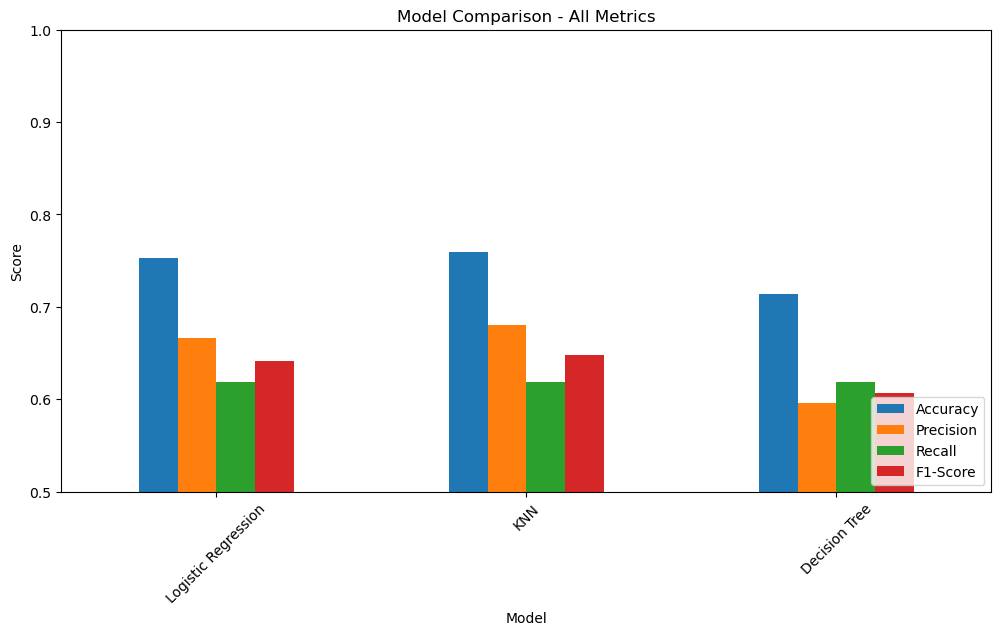

In [43]:
comparison_df.set_index('Model').plot(kind='bar',figsize=(12,6))
plt.ylabel('Score')
plt.title('Model Comparison - All Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.ylim(0.5,1.0)

Compare Training vs Testing Performance

In [44]:
train_acc_lr=lr.score(X_train,y_train)
train_acc_knn=knn.score(X_train,y_train)
train_acc_dt=dt.score(X_train,y_train)

In [45]:
train_test_df=pd.DataFrame({
    'Model':['Logistic Regression','KNN','Decision Tree'],
    'Train Accuracy':[train_acc_lr,train_acc_knn,train_acc_dt],
    'Test Accuracy':[accuracy_lr,accuracy_knn,accuracy_dt]
})

In [46]:
train_test_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.770358,0.753247
1,KNN,0.802932,0.759740
2,Decision Tree,1.000000,0.714286


(0.6, 1.0)

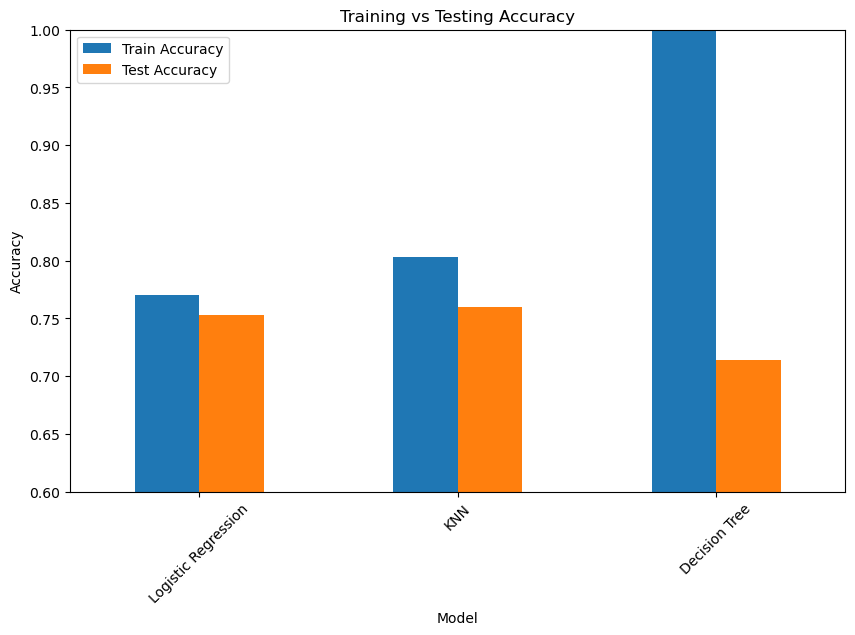

In [47]:
train_test_df.set_index('Model').plot(kind='bar',figsize=(10,6))
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.6,1.0)

Cross-Validation Scores

In [48]:
cv_lr=cross_val_score(lr,X_scaled,y,cv=5)

In [49]:
cv_lr

array([0.75974026, 0.74675325, 0.78571429, 0.79738562, 0.77124183])

In [50]:
cv_lr.mean()

np.float64(0.7721670486376369)

In [51]:
cv_knn=cross_val_score(knn,X_scaled,y,cv=5)

In [52]:
cv_knn

array([0.76623377, 0.76623377, 0.73376623, 0.81045752, 0.75163399])

In [53]:
cv_knn.mean()

np.float64(0.7656650539003481)

In [54]:
cv_dt=cross_val_score(dt,X_scaled,y,cv=5)

In [55]:
cv_dt

array([0.71428571, 0.65584416, 0.64935065, 0.76470588, 0.76470588])

In [56]:
cv_dt.mean()

np.float64(0.7097784568372804)

In [57]:
cv_df=pd.DataFrame({
    'Model':['Logistic Regression','KNN','Decision Tree'],
    'CV Mean':[cv_lr.mean(),cv_knn.mean(),cv_dt.mean()],
    'CV Std':[cv_lr.std(),cv_knn.std(),cv_dt.std()]
})

In [58]:
cv_df

,Model,CV Mean,CV Std
0,Logistic Regression,0.772167,0.018004
1,KNN,0.765665,0.025383
2,Decision Tree,0.709778,0.050229


Confusion Matrix Comparison

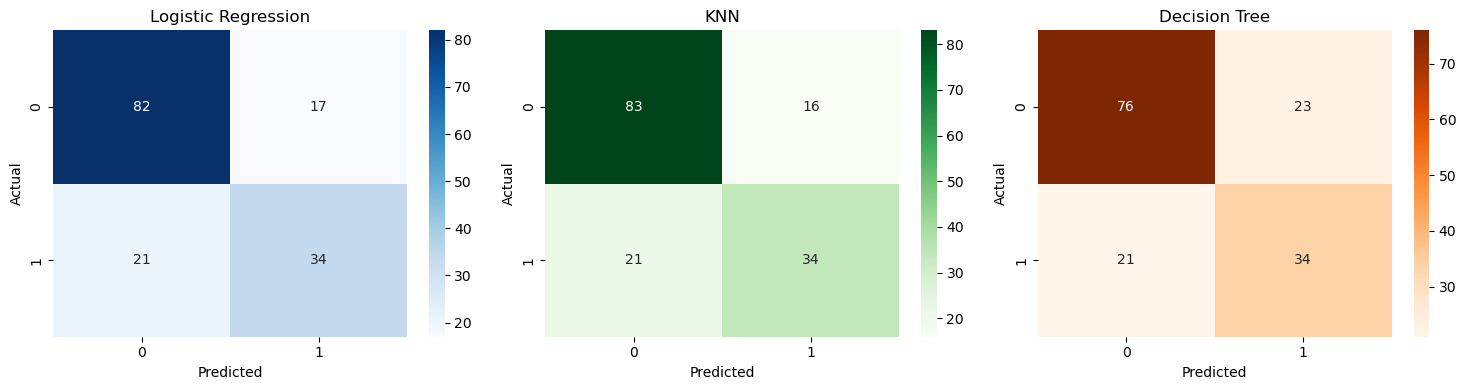

In [59]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='d',ax=axes[0],cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='d',ax=axes[1],cmap='Greens')
axes[1].set_title('KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='d',ax=axes[2],cmap='Oranges')
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()

Classification Reports

In [60]:
print("Logistic Regression:")
print(classification_report(y_test,y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [61]:
print("KNN:")
print(classification_report(y_test,y_pred_knn))

KNN:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [62]:
print("Decision Tree:")
print(classification_report(y_test,y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



ROC Curve and AUC Score

In [63]:
y_pred_proba_lr=lr.predict_proba(X_test)[:,1]
y_pred_proba_knn=knn.predict_proba(X_test)[:,1]
y_pred_proba_dt=dt.predict_proba(X_test)[:,1]

In [64]:
auc_lr=roc_auc_score(y_test,y_pred_proba_lr)
auc_knn=roc_auc_score(y_test,y_pred_proba_knn)
auc_dt=roc_auc_score(y_test,y_pred_proba_dt)

In [65]:
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"KNN AUC: {auc_knn:.4f}")
print(f"Decision Tree AUC: {auc_dt:.4f}")

Logistic Regression AUC: 0.8230
KNN AUC: 0.8159
Decision Tree AUC: 0.6929


In [66]:
fpr_lr,tpr_lr,_=roc_curve(y_test,y_pred_proba_lr)
fpr_knn,tpr_knn,_=roc_curve(y_test,y_pred_proba_knn)
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba_dt)

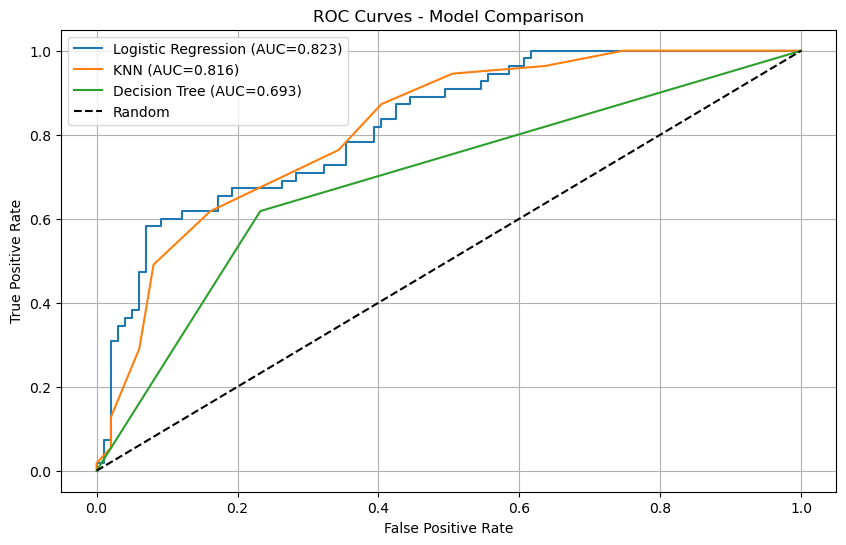

In [67]:
plt.figure(figsize=(10,6))
plt.plot(fpr_lr,tpr_lr,label=f'Logistic Regression (AUC={auc_lr:.3f})')
plt.plot(fpr_knn,tpr_knn,label=f'KNN (AUC={auc_knn:.3f})')
plt.plot(fpr_dt,tpr_dt,label=f'Decision Tree (AUC={auc_dt:.3f})')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)

Task 2: Select Best Model

In [68]:
best_accuracy=comparison_df.loc[comparison_df['Accuracy'].idxmax(),'Model']

In [69]:
print(f"Best Model by Accuracy: {best_accuracy}")

Best Model by Accuracy: KNN


In [70]:
best_f1=comparison_df.loc[comparison_df['F1-Score'].idxmax(),'Model']

In [71]:
print(f"Best Model by F1-Score: {best_f1}")

Best Model by F1-Score: KNN


In [72]:
best_auc_model=['Logistic Regression','KNN','Decision Tree'][np.argmax([auc_lr,auc_knn,auc_dt])]

In [73]:
print(f"Best Model by AUC: {best_auc_model}")

Best Model by AUC: Logistic Regression


In [74]:
comparison_df.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
1,KNN,0.759740,0.680000,0.618182,0.647619
0,Logistic Regression,0.753247,0.666667,0.618182,0.641509
2,Decision Tree,0.714286,0.596491,0.618182,0.607143


Task 3: Summarize Results and Observations

In [75]:
summary_df=pd.DataFrame({
    'Model':['Logistic Regression','KNN','Decision Tree'],
    'Test Accuracy':[accuracy_lr,accuracy_knn,accuracy_dt],
    'Train Accuracy':[train_acc_lr,train_acc_knn,train_acc_dt],
    'CV Mean':[cv_lr.mean(),cv_knn.mean(),cv_dt.mean()],
    'F1-Score':[f1_lr,f1_knn,f1_dt],
    'AUC':[auc_lr,auc_knn,auc_dt]
})

In [76]:
summary_df

,Model,Test Accuracy,Train Accuracy,CV Mean,F1-Score,AUC
0,Logistic Regression,0.753247,0.770358,0.772167,0.641509,0.822957
1,KNN,0.759740,0.802932,0.765665,0.647619,0.815886
2,Decision Tree,0.714286,1.000000,0.709778,0.607143,0.692929


In [77]:
summary_df['Overfitting']=summary_df['Train Accuracy']-summary_df['Test Accuracy']

In [78]:
summary_df

,Model,Test Accuracy,Train Accuracy,CV Mean,F1-Score,AUC,Overfitting
0,Logistic Regression,0.753247,0.770358,0.772167,0.641509,0.822957,0.017112
1,KNN,0.759740,0.802932,0.765665,0.647619,0.815886,0.043191
2,Decision Tree,0.714286,1.000000,0.709778,0.607143,0.692929,0.285714


In [79]:
summary_df.sort_values('Test Accuracy',ascending=False)

,Model,Test Accuracy,Train Accuracy,CV Mean,F1-Score,AUC,Overfitting
1,KNN,0.759740,0.802932,0.765665,0.647619,0.815886,0.043191
0,Logistic Regression,0.753247,0.770358,0.772167,0.641509,0.822957,0.017112
2,Decision Tree,0.714286,1.000000,0.709778,0.607143,0.692929,0.285714
